In [1]:
from src.syntheticdata.processor import FactoryLoader, datasets

for k, v in datasets.items():
    print(f"Available datasets: {k}: {v}")

fl = FactoryLoader(datasets['av-redscience'])

# fl.factories

Available datasets: av-redscience: raw/txt/av
Available datasets: factorio-tech-json: raw/json/factorio-tech
Available datasets: factorio-tech: raw/csv/factorio-tech
Available datasets: factorio-codex: raw/csv/factorio-codex
Available datasets: idan: raw/csv/idan_blueprints.csv


In [9]:
from draftsman.data import items
from src.pipeline.loaders import FactoryLoader, RecipeWhitelist, Whitelist, Blacklist, Required, SizeRestrictor
from src.syntheticdata.processor import datasets

fl = FactoryLoader(datasets['factorio-tech'])
# banned = Blacklist(['pipe', 'beacon'])
allowed = RecipeWhitelist(['assembling-machine-1', 'transport-belt', 'inserter', 'small-electric-pole',
                           'iron-gear-wheel', 'electronic-circuit', 'automation-science',
                           'steel-chest', 'iron-chest', 'wooden-chest', 'copper-cable'])
banned = Blacklist(['pipe', 'pipe-to-ground', 'storage-tank', 'electric-mining-drill', 'logistic-chest-requester',
                    'straight-rail', 'solar-panel', 'express-transport-belt', 'constant-combinator',
                    'ghost-scanner'])
requires_assembler = Required(['assembling-machine-1', 'assembling-machine-2', 'assembling-machine-3'])
requires_inserter = Required(['inserter', 'fast-inserter', 'bulk-inserter', 'long-armed-inserter'])

# transform_list = [allowed, banned, requires_assembler, requires_inserter]
transform_list = [Whitelist(items.raw.keys()), SizeRestrictor(5, 5)]
iters = fl
for sieve in transform_list:
    iters = filter(sieve, iters)

lll = list(iters)
print(len(lll))

94


/Users/david/src/nyu/factorio-working-group/src/visualization.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


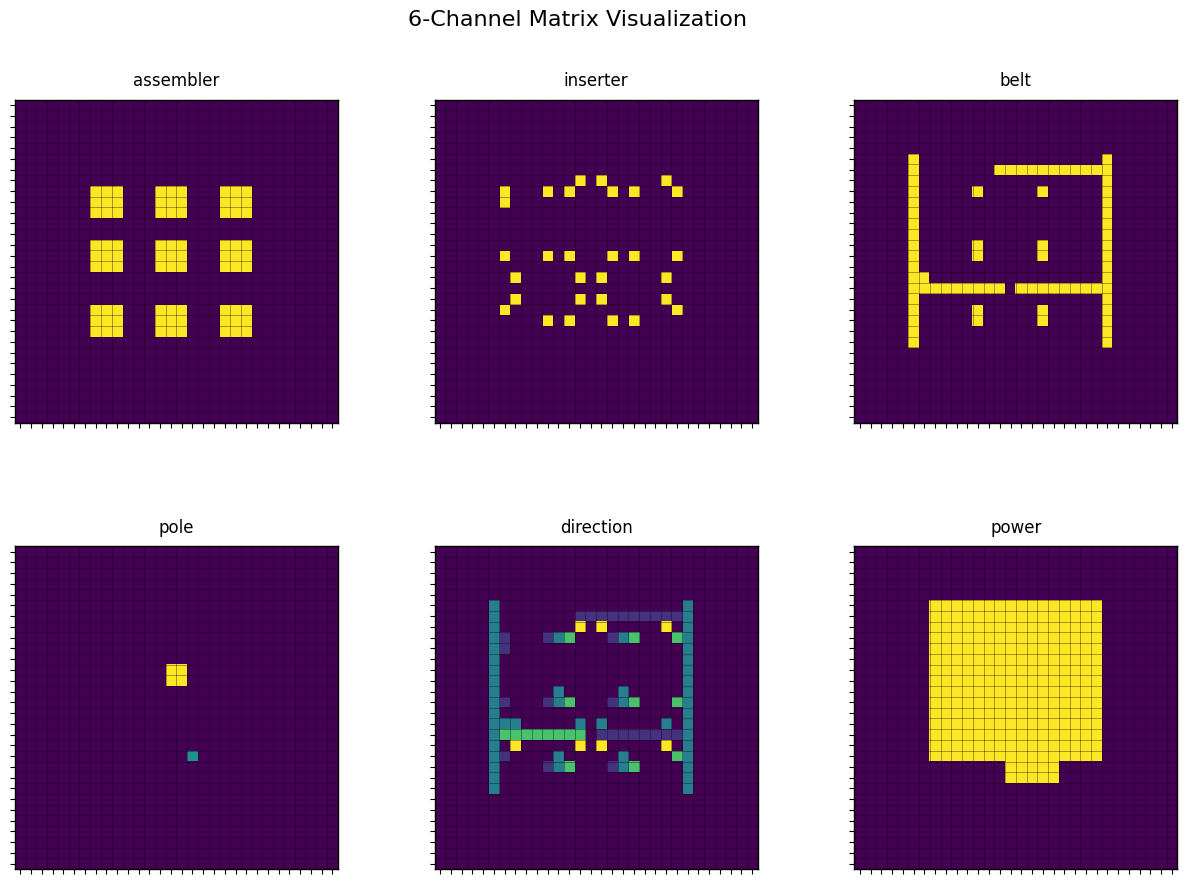

In [5]:
from src.visualization import visualize_multichannel_matrix

i = lll[1].get_matrix(dims=(30,30), repr_version=2, center=True)
fig = visualize_multichannel_matrix(i)

In [7]:
from draftsman.data import items

items.raw.keys()

odict_keys(['wooden-chest', 'iron-chest', 'steel-chest', 'storage-tank', 'transport-belt', 'fast-transport-belt', 'express-transport-belt', 'turbo-transport-belt', 'underground-belt', 'fast-underground-belt', 'express-underground-belt', 'turbo-underground-belt', 'splitter', 'fast-splitter', 'express-splitter', 'turbo-splitter', 'loader', 'fast-loader', 'express-loader', 'turbo-loader', 'burner-inserter', 'inserter', 'long-handed-inserter', 'fast-inserter', 'bulk-inserter', 'stack-inserter', 'small-electric-pole', 'medium-electric-pole', 'big-electric-pole', 'substation', 'pipe', 'pipe-to-ground', 'pump', 'rail', 'rail-ramp', 'rail-support', 'train-stop', 'rail-signal', 'rail-chain-signal', 'locomotive', 'cargo-wagon', 'fluid-wagon', 'artillery-wagon', 'car', 'tank', 'spidertron', 'logistic-robot', 'construction-robot', 'active-provider-chest', 'passive-provider-chest', 'storage-chest', 'buffer-chest', 'requester-chest', 'roboport', 'small-lamp', 'arithmetic-combinator', 'decider-combin